<a href="https://colab.research.google.com/github/adrianriverar/Simulacion-II/blob/main/AvanzarCarasJuego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema de juego con tablero redondo**

Lanzamos dos monedas y avanzamos a través de los colores, en sentido horario, el número de caras que aparezca.

Si repetimos el procedimiento, ¿son todos los colores igual de probables cuando se paso mucho tiempo jugando?

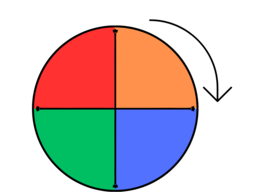

# **Resolución**
## **1. Identifique las variables.**

Tenemos una: 

1.   $X:=$ Número de caras posibles que puede haber al lanzar dos monedas.

## **2. Determine la distribución de probabilidad.**

Debido a los datos proporcionados durante el planteamiento del problema y a su naturaleza misma, se sigue que la variable $\,X\,$ posee una distribución discreta.

## **3. Modele las variables aleatorias.**

Habiendo deducido la distribución de la variable aleatoria, se sigue que

|$X$|0|1|2|
|-|-|-|-|
|$P(X)$|0.25|0.5|0.25|

## **4. Defina el modelo del sistema y los objetivos de la simulación.**

$X\,$ básicamente modela la cantidad de casillas que uno avanza por turno y nuestro tiempo $\,t\,$ será modelado como el número del turno (lanzamiento de dos monedas) en el que nos encontramos.

Se deduce que por la misma naturaleza cíclica del tablero, basta con analizar el juego comenzando desde cualquiera de los colores: no es necesario analizar cada caso donde cada color es el punto de inicio.

### **Objetivo:**

La probabilidad de que uno caiga en cada uno de los colores después de mucho tiempo jugando será estimada con la frecuencia con la que cada uno de los colores va siendo en el cual caigamos conforme avanza el tiempo.

Por lo tanto, implementamos el siguiente código:

In [106]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [107]:
def turno(color_inicial):                                   # Función que devuelve el color en el caíste al finalizar un turno.
  X = np.random.choice([0, 1, 2], p = [0.25, 0.5, 0.25])     # Generamos v.a. X según su distribución especificada anteriormente.
  color_final = color_inicial + X
  if color_final > 4:                                        # El rojo, naranja, azul y verde están respectivamente mapeados en
    color_final -= 4                                         #en sentido horario del 1 al 4. Aquí corregimos cuando el mapeo del
  return color_final                                         #color en el que caíste es mayor que 4.

In [108]:
turno(4)

1

## **5. Diseñe el experimento.**

Para estimar la probabilidad de caer en cada uno de los colores después de muchos turnos, ejecutamos $\,n\,$ veces la función anterior y calculamos de manera acumulativa la probabilidad deseada a estimar.

In [109]:
n = 3000    # Definiendo tamaño de muestra (número de turnos) "n" grande y arbitraria.

In [110]:
def experimento(n, color_inicial):                    # Función que devuelve lista "evol_prob", la cual contiene sublistas con los 
  evol_prob = [[], [], [], []]                        #valores de la probabilidades estimadas de que caigas en cada color.
  frec = [0, 0, 0, 0]
  for i in range(n):
    color = turno(color_inicial)
    frec[color - 1] += 1
    evol_prob[color-1].append(frec[color-1]/(i+1))
    color_inicial = color
  return evol_prob

In [111]:
evol_prob = experimento(n, 1)    # Realizamos el experimento iniciando en el color 1 (rojo).

In [112]:
colores = [['Rojo', 'r'], ['Naranja', 'orange'], ['Azul', 'b'], ['Verde', 'g']]    # Nombres colores y claves de color.

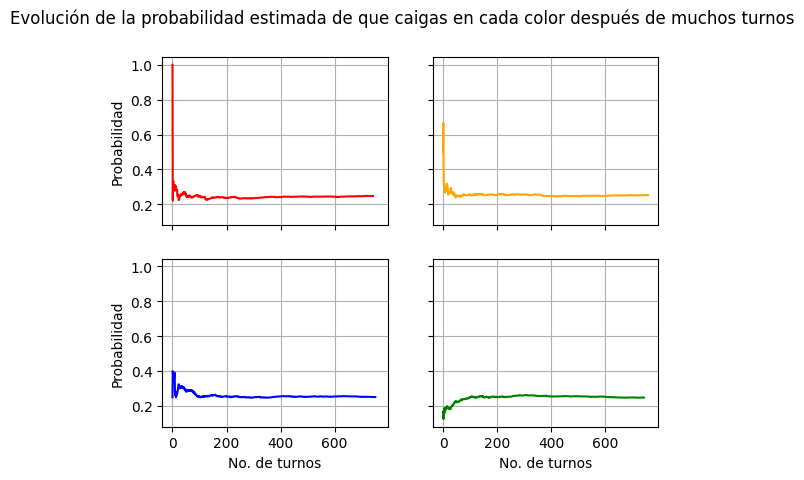

In [113]:
fig, axs = plt.subplots(2, 2, sharex = True, sharey = True)    # Podemos asegurar que existe convergencia con 1000 iteraciones.
fig.suptitle('Evolución de la probabilidad estimada de que caigas en cada color después de muchos turnos')
color = 0
for i in range(2):
  for j in range(2):
    axs[i, j].plot(evol_prob[color], colores[color][1])
    axs[i, j].set(xlabel = 'No. de turnos', ylabel = 'Probabilidad')  
    axs[i, j].grid()
    color += 1

for ax in axs.flat:
    ax.label_outer()

plt.show()

In [114]:
n = 1000    # Definimos el número de turnos con los que se estudiará cada experimento para cada color.

In [115]:
for color in range(4):
  print(colores[color][0],': mu =', np.mean(evol_prob[color]), ', sigma =', np.std(evol_prob[color]))

Rojo : mu = 0.24495810369543491 , sigma = 0.029227717357315802
Naranja : mu = 0.2544108614646952 , sigma = 0.020152399415282574
Azul : mu = 0.2586369750947851 , sigma = 0.01714423619002212
Verde : mu = 0.24852745773747528 , sigma = 0.01706473626992789


## **6. Repita el experimento $N$ veces.**

Primero, necesitamos determinar el número $N$ de veces necesarias que se debe simular el experimento para que la probabilidad estimada de que ocurra la observación deseada difiera de su valor verdadero en menos de $\epsilon$ con un nivel de confianza del $(1 − \alpha)\%$.

Este número $N$ está dado por

  \begin{align}
  N > \left( \frac{2 \sigma Z_{\alpha/2}}{\epsilon} \right)^2
  \end{align}

Implementamos el siguiente código:

In [116]:
epsilon = 0.01    # Establecer la cota superior epsilon para el error de la probabilidad estimada.
alpha = 0.05      # Indicar el grado de significancia que tendrá el valor establecido para epsilon.

In [117]:
N = []                                                                                   # Cálculo del número de simulaciones
for color in range(4):                                                                   #para cada experimento.
  N.append(int(np.ceil((2*np.std(evol_prob[color])*norm.ppf(1-alpha/2)/epsilon)**2)))
print(N)

[132, 63, 46, 45]


In [118]:
def simulacion(N_list, color_inicial):                 # Función que devuelve una lista "prob", la cual contine las probabilidades
  prob = [[], [], [], []]                              #estimadas promedio de los respectivos N experimentos realizados para cada
  color = 0                                            #color.
  for N in N_list:
    for i in range(N):
      evol_prob = experimento(n, color_inicial)
      prob[color].append(np.mean(evol_prob[color]))
    color += 1
  return prob

In [119]:
prob = simulacion(N, 1)    # Realizamos la simulación.

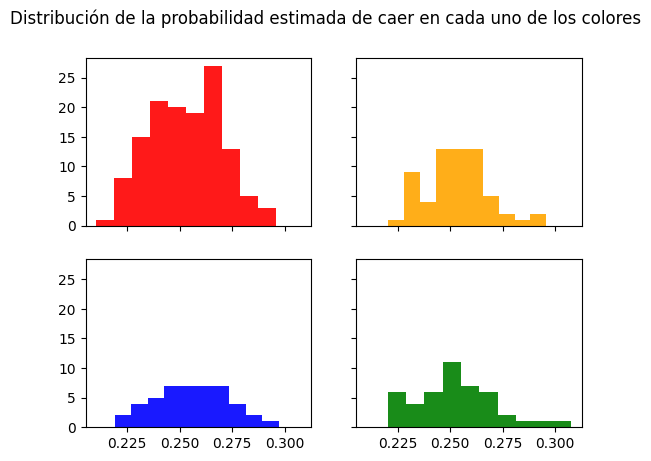

In [120]:
fig, axs = plt.subplots(2, 2, sharex = True, sharey = True)
fig.suptitle('Distribución de la probabilidad estimada de caer en cada uno de los colores')
color = 0
for i in range(2):
  for j in range(2):
    axs[i, j].hist(prob[color], color = colores[color][1], alpha = 0.9)
    color += 1

for ax in axs.flat:
    ax.label_outer()

plt.show()

In [121]:
for color in range(4):
  print(colores[color][0],': mu =', np.mean(prob[color]), ', sigma =', np.std(prob[color]))

Rojo : mu = 0.2533255496674455 , sigma = 0.017492224459886005
Naranja : mu = 0.25335945642943075 , sigma = 0.014683602552581254
Azul : mu = 0.2556099800527843 , sigma = 0.016882008804804036
Verde : mu = 0.2521399630859444 , sigma = 0.019067125181923807


## **7. Hallamos el intervalo de confianza.**

Utilizamos la fórmula
  \begin{align}
  \bar{x} - Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}} < \mu < \bar{x} + Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}
  \end{align}

Implementamos el siguiente código:

In [128]:
mu = []
for color in range(4):
  mu.append(np.mean(prob[color]))
  li = mu[color] - norm.ppf(1 - alpha / 2) * np.std(prob[color]) / np.sqrt(n)
  ls = mu[color] + norm.ppf(1 - alpha / 2) * np.std(prob[color]) / np.sqrt(n)
  print(colores[color][0], ':', li, '<', mu[color], '<', ls)

Rojo : 0.2522413902850262 < 0.2533255496674455 < 0.2544097090498649
Naranja : 0.2524493740375883 < 0.25335945642943075 < 0.2542695388212732
Azul : 0.25456364153353034 < 0.2556099800527843 < 0.25665631857203824
Verde : 0.25095819213913584 < 0.2521399630859444 < 0.25332173403275293


## **8. Comparamos con la solución analítica.**

Armamos la matriz estocástica para el caso estudiado, basándonos en la distribución de $\,X\,$ anteriormente deducida.

Definimos cada estado $\,i\,$ utilizando el mapeo numérico que utilizamos para cada color a lo largo de la resolución del problema y obtenemos
  
  \begin{align}
  P = \begin{bmatrix}
      \frac{1}{4} & \frac{1}{2} & \frac{1}{4} & 0 \\
      0 & \frac{1}{4} & \frac{1}{2} & \frac{1}{4} \\
      \frac{1}{4} & 0 & \frac{1}{4} & \frac{1}{2} \\
      \frac{1}{2} & \frac{1}{4} & 0 & \frac{1}{4}
      \end{bmatrix}
  \end{align}

Ahora construimos el sistema de ecuaciones que nos permitirá calcular las probabilidades estacionarias o límite $\,\pi_i\,$ de nuestra matriz de transición $\,P\,$.

  \begin{align}
  \pi_1 &= \frac{\pi_1}{4} + \frac{\pi_3}{4} + \frac{\pi_4}{2} \\
  \pi_2 &= \frac{\pi_1}{2} + \frac{\pi_2}{4} + \frac{\pi_4}{4} \\
  \pi_3 &= \frac{\pi_1}{4} + \frac{\pi_2}{2} + \frac{\pi_3}{4} \\
  \pi_4 &= \frac{\pi_2}{4} + \frac{\pi_3}{2} + \frac{\pi_4}{4} \\
  \pi_1 &+ \pi_2 + \pi_3 + \pi_4 = 1
  \end{align}

Resolvemos el sistema mediante Gauss-Jordan y obtenemos $$\pi_i = \frac{1}{4}$$

Y por la misma definición de la probabilidad límite, donde se afirma que las probabilidades calculadas $\,\pi_i\,$ son la probabilidad de llegar al estado $\,i\,$ partiendo desde cualquiera de los estados después de muchísimo tiempo; podemos seguir que todos los casos, en donde se comienza desde cada color, ya están considerados en esta respuesta.

Implementamos el siguiente código:

In [124]:
mu_ana = 1 / 4    # Solución analítica.
for color in range(4):
  print(colores[color][0], ':', mu_ana)

Rojo : 0.25
Naranja : 0.25
Azul : 0.25
Verde : 0.25


# **Solución**

In [135]:
print('Si se juegan ' + str(n) + ' turnos en la partida jugada,\n\n')
print('La probabilidad estimada mediante simulación de caer en un color después de muchos turnos jugados es, para cada color, del:\n')
for color in range(4):
  print(colores[color][0], ': ' + str(round(mu[color]*100, 2)) + '%.\n')

print('\nLas cuales difieren respectivamente en un ', end = '')
for color in range(3):
  print(str(abs(round((mu[color] - mu_ana)*100 / mu_ana, 2))) + '%, ', end = '')
print(str(abs(round((mu[3] - mu_ana)*100 / mu_ana, 2))) + '% de la solución analítica.')

Si se juegan 1000 turnos en la partida jugada,


La probabilidad estimada mediante simulación de caer en un color después de muchos turnos jugados es, para cada color, del:

Rojo : 25.33%.

Naranja : 25.34%.

Azul : 25.56%.

Verde : 25.21%.


Las cuales difieren respectivamente en un 1.33%, 1.34%, 2.24%, 0.86% de la solución analítica.
